<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Logistic Regression


---


## Learning Objectives

### Core
- Understand how logistic regression is similar to and different from regression
- Fit logistic regression with sklearn on a dataset
- Understand how to interpret the coefficients of logistic regression as enhancing/diminishing the probability of belonging to a given class
- Know the benefits of logistic regression as a parametric classification model with interpretable coefficients

### Target
- Fit logistic regression with statsmodels on a dataset
- Code the calculation of the odds and log-odds

### Stretch
- Understand the math behind the logit link function (and logistic function)

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li><li><span><a href="#Stretch" data-toc-modified-id="Stretch-1.3">Stretch</a></span></li></ul></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2">Introduction</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Some-examples-of-when-logistic-regression-could-be-used:" data-toc-modified-id="Some-examples-of-when-logistic-regression-could-be-used:-2.0.1">Some examples of when logistic regression could be used:</a></span></li></ul></li></ul></li><li><span><a href="#The-logit-&quot;link-function&quot;" data-toc-modified-id="The-logit-&quot;link-function&quot;-3">The logit "link function"</a></span></li><li><span><a href="#Aside:-odds" data-toc-modified-id="Aside:-odds-4">Aside: odds</a></span></li><li><span><a href="#How-do-we-get-probabilities-out?-Inverting-the-logit-link-function-with-the-&quot;logistic&quot;-function" data-toc-modified-id="How-do-we-get-probabilities-out?-Inverting-the-logit-link-function-with-the-&quot;logistic&quot;-function-5">How do we get probabilities out? Inverting the logit link function with the "logistic" function</a></span><ul class="toc-item"><li><span><a href="#A-detailed-derivation" data-toc-modified-id="A-detailed-derivation-5.1">A detailed derivation</a></span></li><li><span><a href="#Illustration-of-a-few-functions" data-toc-modified-id="Illustration-of-a-few-functions-5.2">Illustration of a few functions</a></span><ul class="toc-item"><li><span><a href="#The-logit-for-odds" data-toc-modified-id="The-logit-for-odds-5.2.1">The logit for odds</a></span></li><li><span><a href="#The-logit-for-probabilities" data-toc-modified-id="The-logit-for-probabilities-5.2.2">The logit for probabilities</a></span></li><li><span><a href="#Probabilities" data-toc-modified-id="Probabilities-5.2.3">Probabilities</a></span></li></ul></li></ul></li><li><span><a href="#Logistic-regression-with-college-admissions-data" data-toc-modified-id="Logistic-regression-with-college-admissions-data-6">Logistic regression with college admissions data</a></span></li><li><span><a href="#Load-the-college-admissions-data" data-toc-modified-id="Load-the-college-admissions-data-7">Load the college admissions data</a></span><ul class="toc-item"><li><span><a href="#Load-in-the-data-and-do-any-necessary-cleaning." data-toc-modified-id="Load-in-the-data-and-do-any-necessary-cleaning.-7.1">Load in the data and do any necessary cleaning.</a></span></li><li><span><a href="#What-are-the-probabilities-of-admittance-by-prestige?" data-toc-modified-id="What-are-the-probabilities-of-admittance-by-prestige?-7.2">What are the probabilities of admittance by prestige?</a></span></li><li><span><a href="#Write-a-function-to-calculate-odds-and-calculate-the-odds-of-admittance-by-prestige." data-toc-modified-id="Write-a-function-to-calculate-odds-and-calculate-the-odds-of-admittance-by-prestige.-7.3">Write a function to calculate odds and calculate the odds of admittance by prestige.</a></span></li></ul></li><li><span><a href="#Logistic-regression-with-sklearn" data-toc-modified-id="Logistic-regression-with-sklearn-8">Logistic regression with sklearn</a></span></li><li><span><a href="#The-logistic-regression-prediction-line-visually" data-toc-modified-id="The-logistic-regression-prediction-line-visually-9">The logistic regression prediction line visually</a></span></li><li><span><a href="#Interpreting-logistic-regression-coefficients" data-toc-modified-id="Interpreting-logistic-regression-coefficients-10">Interpreting logistic regression coefficients</a></span><ul class="toc-item"><li><span><a href="#Meaning-of-the-betas-in-log-odds" data-toc-modified-id="Meaning-of-the-betas-in-log-odds-10.1">Meaning of the betas in log odds</a></span></li></ul></li><li><span><a href="#Solving-for-the-beta-coefficients" data-toc-modified-id="Solving-for-the-beta-coefficients-11">Solving for the beta coefficients</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-12">Conclusion</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Benefits-of-Logistic-regression-include:" data-toc-modified-id="Benefits-of-Logistic-regression-include:-12.0.1">Benefits of Logistic regression include:</a></span></li></ul></li></ul></li><li><span><a href="#Additional-resources" data-toc-modified-id="Additional-resources-13">Additional resources</a></span></li><li><span><a href="#Code-summary" data-toc-modified-id="Code-summary-14">Code summary</a></span><ul class="toc-item"><li><span><a href="#Sklearn-logistic-regression" data-toc-modified-id="Sklearn-logistic-regression-14.1">Sklearn logistic regression</a></span></li><li><span><a href="#Statsmodels-logistic-regression" data-toc-modified-id="Statsmodels-logistic-regression-14.2">Statsmodels logistic regression</a></span></li><li><span><a href="#Statsmodels-with-regularisation" data-toc-modified-id="Statsmodels-with-regularisation-14.3">Statsmodels with regularisation</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Some nice colors we can use in our plots:
colors = {'blue': '#729ECE',
          'brown': '#A8786E',
          'green': '#67BF5C',
          'grey': '#A2A2A2',
          'orange': '#FF9E4A',
          'pink': '#ED97CA',
          'purple': '#AD8BC9',
          'red': '#ED665D',
          'teal': '#6DCCDA',
          'yellow': '#CDCC5D'}

## Introduction

---

Logistic regression is one of the most frequently used classifiers. It _is_ a regression, but don't let that confuse you: it operates as a classifier. It estimates probabilities of class membership. This is done by predicting the so-called log-odds from a kind of regression model.

In this lesson we will only consider the binary outcome case with two classes, but logistic regression can be generalized to multiple classes.

#### Some examples of when logistic regression could be used:


- Predict whether or not a user will purchase a product given their demographic characteristics
- Predict the likelihood of a student being admitted to a college given their scores and the characteristics of the college
- Diagnose a patient with a disease or not, given symptoms
- Predict whether a person will default on a loan and with what likelihood

And many more. 

## The logit "link function"

---

In logistic regression, we are not predicting a continuous outcome variable as in linear regression, but rather a binary class label.
Logistic regression can still be formulated in a similar way as linear regression, and there are still an intercept and coefficients.



$$\text{logit}\big(P(y=1|X)\big) = \log\bigg(\frac{P(y=1|X)}{1-P(y=1|X)}\bigg) =  \beta_0 + \sum_{j=1}^p X_j\beta_j$$


With the help of the predictors, we obtain values for the log-odds, or, to use another name, for the logit function (which is the inverse of the logistic function) of the probability of $y$ belonging to class 1.


- For the **classes** we have

$$\begin{array}{cc}{\rm either} & y=1 \\ {\rm or}& y=0\end{array}$$

- For the **probabilities** we have

$$0\le P \le 1$$

- For the so-called **odds** we have

$$0\le\frac{P}{1-P}<\infty$$

- For the so-called **log-odds** we have

$$-\infty<\log\bigg(\frac{P}{1-P}\bigg)<\infty$$

Only the fact that the log-odds can take any positive or negative value gives us the possibility to try to determine them on the basis of any kind of predictors.

The logit acts in this case as a so-called **link function**. It translates from probabilities limited between 0 and 1 to log-odds with values between $-\infty$ and $\infty$.

## Aside: odds

---

The initial step in the logit link function involves the use of **odds**. 

Probabilities and odds represent the same thing in different ways. Probabilities can be alternatively expressed as odds. Even though one could well live without odds, they are frequently used, for example in betting, and therefore it can be useful to understand how they are related to each other.

The odds for probability $P$ are defined as

$$\text{odds}(P) = \frac{P}{1-P}$$

The odds of a probability are a measure of how many times more likely an event  is to happen than not to happen.

For example:

- When **`P = 0.5`**: **`odds = 1`**
    - it is equally likely to happen as it is to not happen.
- When **`P = 0.75`**: **`odds = 3`**
    - it is 3 times more likely to happen than not to happen.
- When **`P = 0.40`**: **`odds = 0.666..`**
    - it is 2/3 as likely to happen than not to happen.

## How do we get probabilities out? Inverting the logit link function with the "logistic" function

---

The inverse function of the logit is called the **logistic function**. 

By inverting the logit, we can solve explicitly for $P(y = 1)$:

$$P(y=1|X) = {\rm logit}^{-1}\left(\beta_0 + \sum_{j=1}^p\beta_j X_j\right)$$

where

$$P(y=1|X) =
{\rm logit}^{-1}\left(\beta_0 + \sum_{j=1}^p\beta_j X_j\right) 
= {\rm logistic}\left(\beta_0 + \sum_{j=1}^p\beta_j X_j\right) 
= \frac{1}{1 + e^{-\left(\beta_0 + \sum_{j=1}^p\beta_j X_j\right)}}$$ 

giving us

$$P(y=1|X) = \frac{1}{1+e^{-\left(\beta_0 + \sum_{j=1}^p\beta_{j}X_j\right)}}$$

### A detailed derivation

--- 

To derive how we obtain the probabilities from the log-odds, let's set 

$$a = \beta_0+\beta_1 X_1 + \ldots + \beta_n X_n$$.

Then

$$
\begin{eqnarray}
\log \frac{P}{1-P} &=&  a\\
\frac{P}{1-P} &=& e^a\\
P &=& (1-P)\,e^a\\
P\,(1+e^a) &=& e^a \\
P &=& \frac{e^a}{1+e^a}\\
P &=& \frac{1}{1+e^{-a}}
\end{eqnarray}
$$

Inserting $a$ gives

$$
P = \frac{1}{1+e^{-\left(\beta_0+\beta_1 X_1 + \ldots + \beta_n X_n\right)}}
$$

<a id='logistic-viz'></a>

### Illustration of a few functions

#### The logit for odds

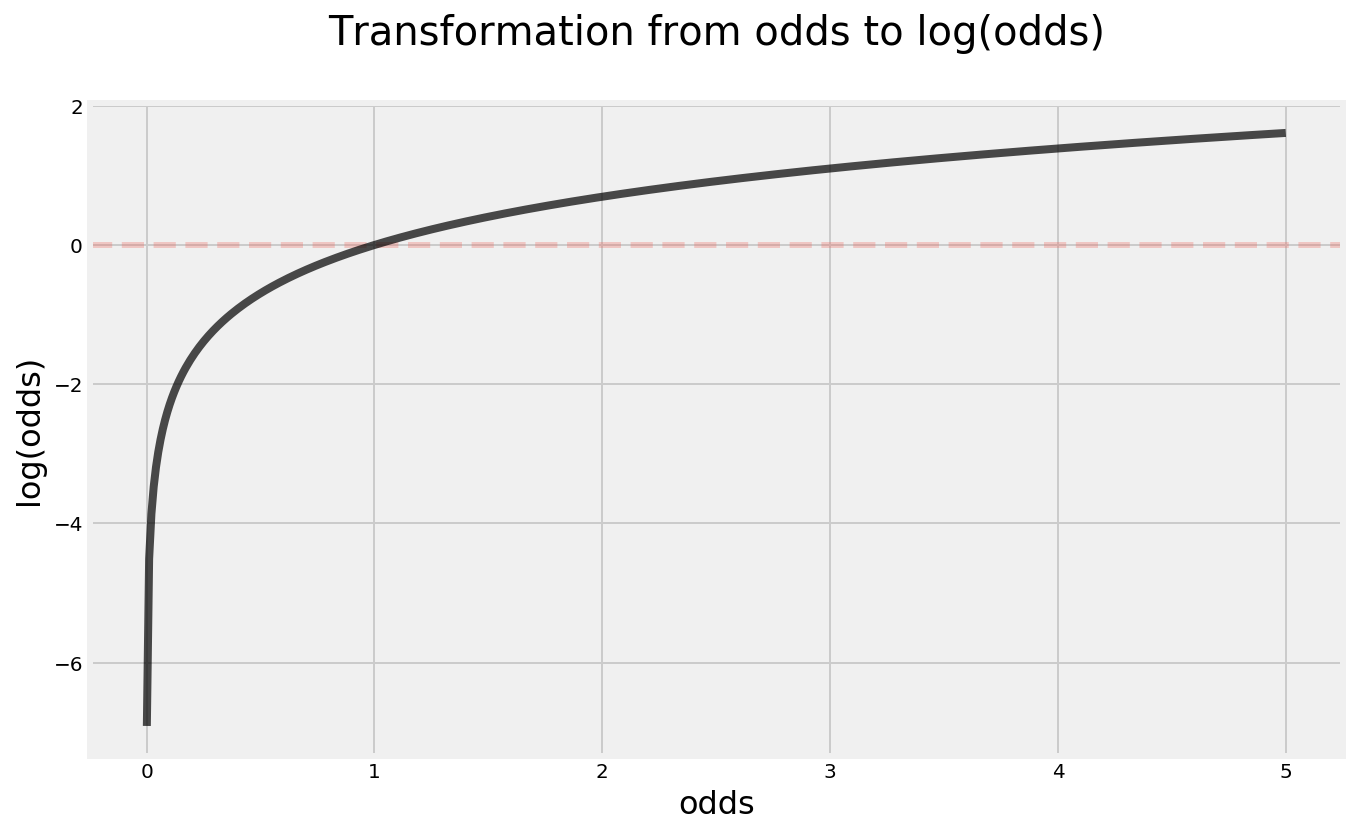

In [3]:
# create some positive x-values as suitable for odd
xs = np.linspace(0.001, 5, 500)
ys = np.log(xs)

plt.figure(figsize=[10, 6])
plt.axhline(y=0, linewidth=3, c=colors['red'], ls='dashed', alpha=0.3)
plt.plot(xs, ys, lw=4, c='black', alpha=0.7)

plt.xlabel('odds', fontsize=16)
plt.ylabel('log(odds)', fontsize=16)
plt.title('Transformation from odds to log(odds)\n', fontsize=20)
plt.show()

#### The logit for probabilities

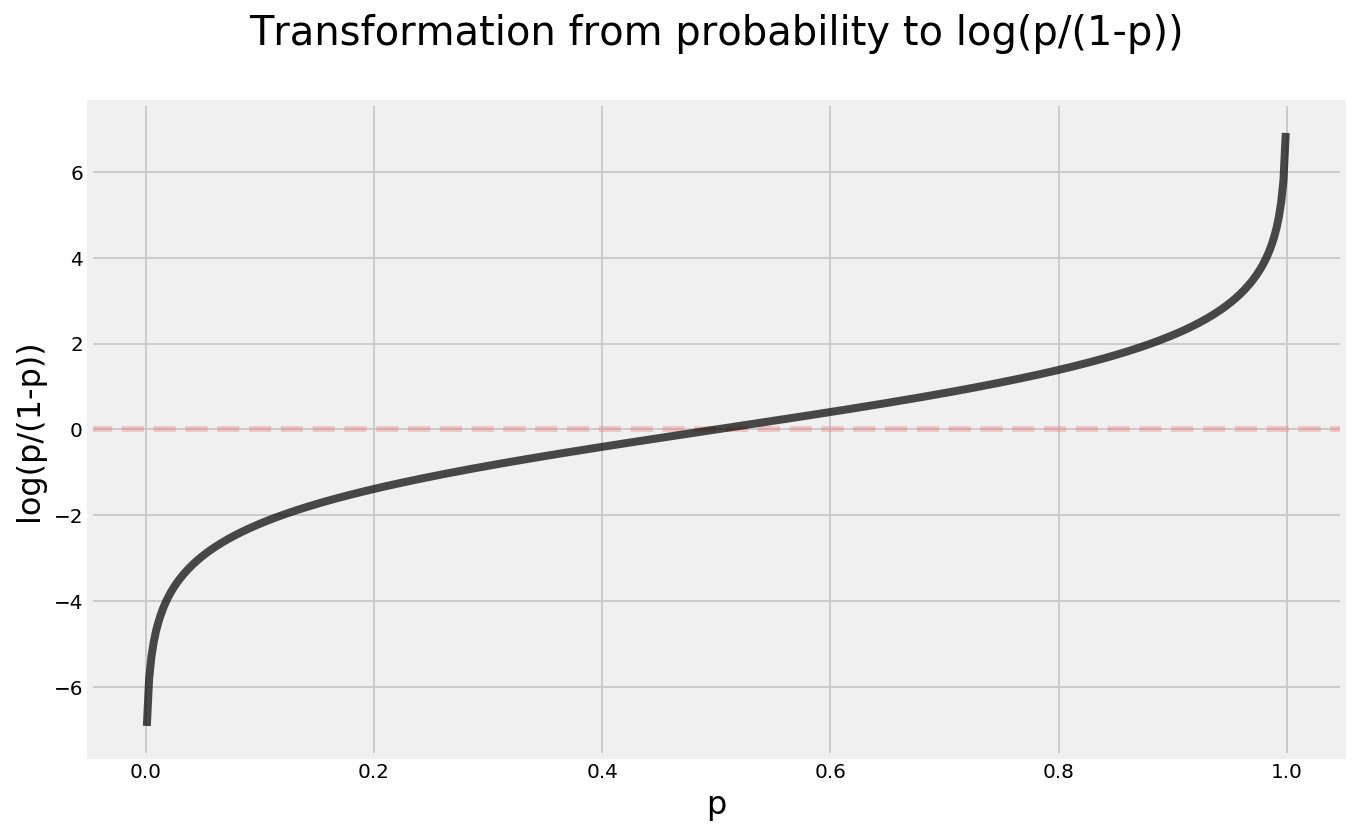

In [4]:
# create some x-values between 0 and 1 as suitable for probabilities
xs = np.linspace(0.001, 0.999, 500)
ys = np.log(xs/(1-xs))

plt.figure(figsize=[10, 6])
plt.axhline(y=0, linewidth=3, c=colors['red'], ls='dashed', alpha=0.3)
plt.plot(xs, ys, lw=4, c='black', alpha=0.7)

plt.xlabel('p', fontsize=16)
plt.ylabel('log(p/(1-p))', fontsize=16)
plt.title('Transformation from probability to log(p/(1-p))\n', fontsize=20)
plt.show()

#### Probabilities

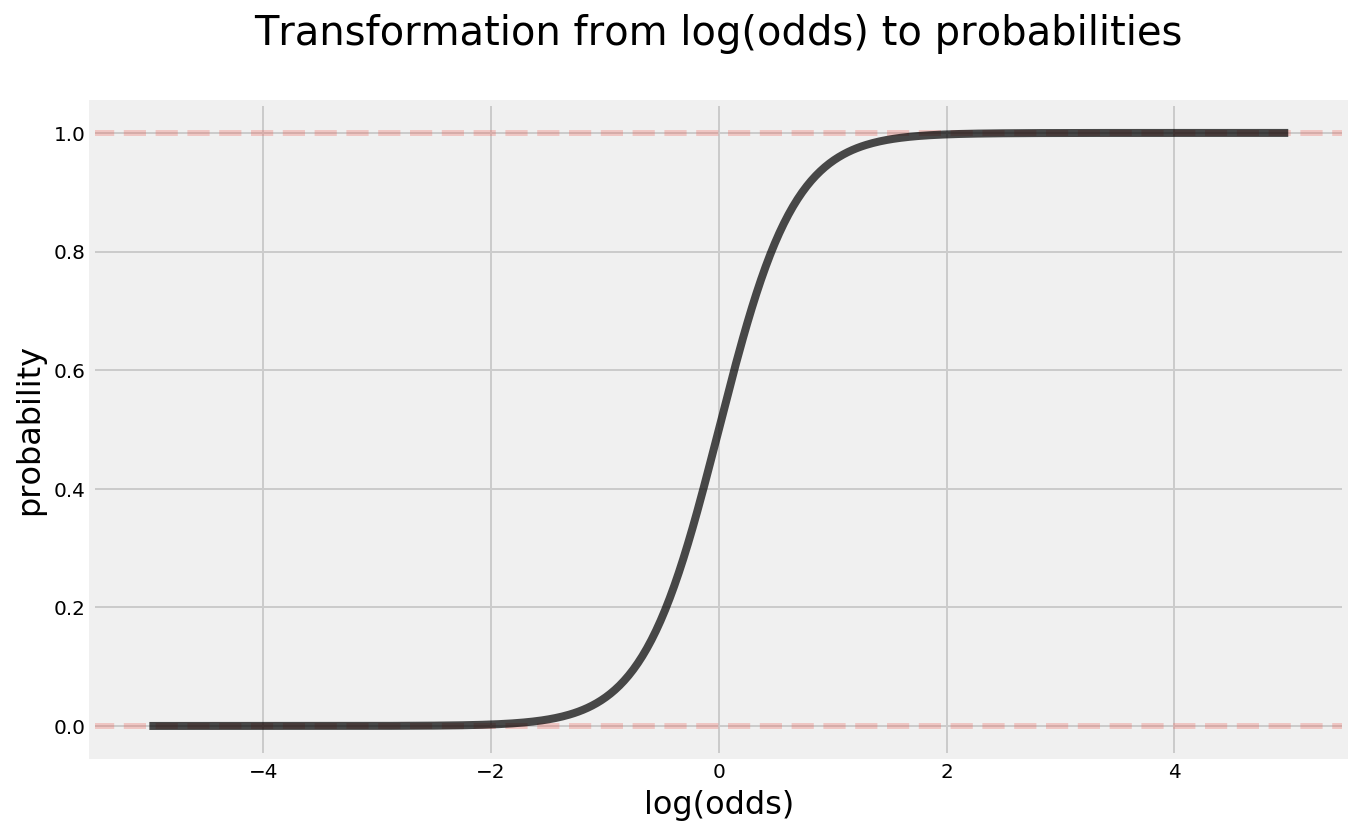

In [5]:
# create some x-values as suitable for a continuous predictor variable
xs = np.linspace(-5, 5, 500)
ys = 1/(1+np.exp(-(3*xs)))

plt.figure(figsize=[10, 6])
plt.axhline(y=0, linewidth=3, c=colors['red'], ls='dashed', alpha=0.3)
plt.axhline(y=1, linewidth=3, c=colors['red'], ls='dashed', alpha=0.3)
plt.plot(xs, ys, lw=4, c='black', alpha=0.7)

plt.xlabel('log(odds)', fontsize=16)
plt.ylabel('probability', fontsize=16)
plt.title('Transformation from log(odds) to probabilities\n', fontsize=20)
plt.show()

## Logistic regression with college admissions data

---

In [6]:
from sklearn.linear_model import LogisticRegression

## Load the college admissions data

---

To illustrate how to apply logistic regression, we will be using some basic college admissions data. The data only has a few columns:
- `admit`: a binary 1-0 variable indicating whether a student was admitted
- `gre`: the student's GRE score
- `gpa`: the student's GPA
- `prestige`: a rating for the "prestige" of the college

### Load in the data and do any necessary cleaning.

In [7]:
admissions = pd.read_csv(
    '../../../../resource-datasets/admissions/admissions.csv')

In [8]:
admissions.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [9]:
# check for missing values
admissions.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [10]:
# drop missing values
admissions.dropna(inplace=True)

### What are the probabilities of admittance by prestige?

In [11]:
admissions.prestige.unique()

array([3., 1., 4., 2.])

In [12]:
y_p1 = admissions[admissions.prestige == 1].admit
y_p2 = admissions[admissions.prestige == 2].admit
y_p3 = admissions[admissions.prestige == 3].admit
y_p4 = admissions[admissions.prestige == 4].admit

In [42]:
admissions.prestige.head()

0    3.0
1    3.0
2    1.0
3    4.0
4    4.0
Name: prestige, dtype: float64

In [14]:
y_p1.value_counts()

1    33
0    28
Name: admit, dtype: int64

In [15]:
print('P(admit | prestige = 1):', np.mean(y_p1))
print('P(admit | prestige = 2):', np.mean(y_p2))
print('P(admit | prestige = 3):', np.mean(y_p3))
print('P(admit | prestige = 4):', np.mean(y_p4))

P(admit | prestige = 1): 0.5409836065573771
P(admit | prestige = 2): 0.3581081081081081
P(admit | prestige = 3): 0.23140495867768596
P(admit | prestige = 4): 0.1791044776119403


### Write a function to calculate odds and calculate the odds of admittance by prestige.

In [16]:
def odds(p):
    return p / (1 - p)

In [17]:
print('odds(admit | prestige = 1):', odds(np.mean(y_p1)))
print('odds(admit | prestige = 2):', odds(np.mean(y_p2)))
print('odds(admit | prestige = 3):', odds(np.mean(y_p3)))
print('odds(admit | prestige = 4):', odds(np.mean(y_p4)))

odds(admit | prestige = 1): 1.1785714285714288
odds(admit | prestige = 2): 0.5578947368421053
odds(admit | prestige = 3): 0.3010752688172043
odds(admit | prestige = 4): 0.21818181818181817


## Logistic regression with sklearn
---

Logistic regression is implemented in a similar way as linear regression and k-nearest-neighbors. We instantiate a model object, perform the fit, and can then extract model coefficients, predicted probabilities and predicted labels.

> **Note:** Before starting with the modeling, we need to standardize our predictors. This is because, different from linear regression, sklearn's logistic regression uses regularization by default.

We will see later that statsmodels does not use regularization by default and one could proceed without rescaling.


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

We want to illustrate our findings first with a very simple example taking only one predictor (`gpa`) into account. Additionally, we restrict here to `prestige==1` to get a clearer signal.

In [19]:
# subset to prestige == 1
admit = admissions[admissions.prestige == 1]

In [20]:
y = admit.admit
X = scaler.fit_transform(admit[['gpa']])
# set the index explicitly because it results from the prestige=1 subset
X = pd.DataFrame(X, columns=['gpa'], index=admit.index)

In [21]:
y.mean()  #baseline

0.5409836065573771

In [22]:
y.value_counts(normalize=True)

1    0.540984
0    0.459016
Name: admit, dtype: float64

In [23]:
logreg = LogisticRegression (solver='lbfgs')
logreg.fit(X, y)

print('Logreg intercept:', logreg.intercept_)
print('Logreg coef(s):', logreg.coef_)
print('Logreg predicted probabilities:\n',
      logreg.predict_proba(X.iloc[:20, :]))

Logreg intercept: [0.17118995]
Logreg coef(s): [[0.50057723]]
Logreg predicted probabilities:
 [[0.29365572 0.70634428]
 [0.60826211 0.39173789]
 [0.53244536 0.46755464]
 [0.29365572 0.70634428]
 [0.29365572 0.70634428]
 [0.34700294 0.65299706]
 [0.39210826 0.60789174]
 [0.40760735 0.59239265]
 [0.509882   0.490118  ]
 [0.55806526 0.44193474]
 [0.5227862  0.4772138 ]
 [0.50665322 0.49334678]
 [0.38290999 0.61709001]
 [0.37077587 0.62922413]
 [0.5644276  0.4355724 ]
 [0.29365572 0.70634428]
 [0.51310996 0.48689004]
 [0.39828372 0.60171628]
 [0.42329249 0.57670751]
 [0.53244536 0.46755464]]


In [24]:
print('Logreg predicted labels:\n', logreg.predict(X)[:20])

Logreg predicted labels:
 [1 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0]


In [25]:
# predicted class labels
logreg.classes_

array([0, 1])

In [26]:
# get all the predictions
predictions = logreg.predict(X)

In [27]:
# check how many correct predictions we made
(predictions == y).sum()

46

In [28]:
# total number of observations
len(y)

61

In [29]:
# accuracy by hand
(predictions == y).sum()/len(y)

0.7540983606557377

In [30]:
# model score (accuracy by default)
logreg.score(X, y)

0.7540983606557377

In [31]:
# What do we get if the log-odds are zero?

# 0 = b0 + b1x
# -b0 = b1x
# -b0/b1 = x

xval_chance = (-1 * logreg.intercept_[0])/logreg.coef_[0][0]
print(logreg.intercept_+xval_chance*logreg.coef_[0][0])
print(xval_chance)

print(logreg.predict_proba([[xval_chance]]))

[0.]
-0.3419850886205364
[[0.5 0.5]]


## The logistic regression prediction line visually

---

Let's plot the prediction of `admit` using sklearn's `LogisticRegression` class and see what the regression line looks like.

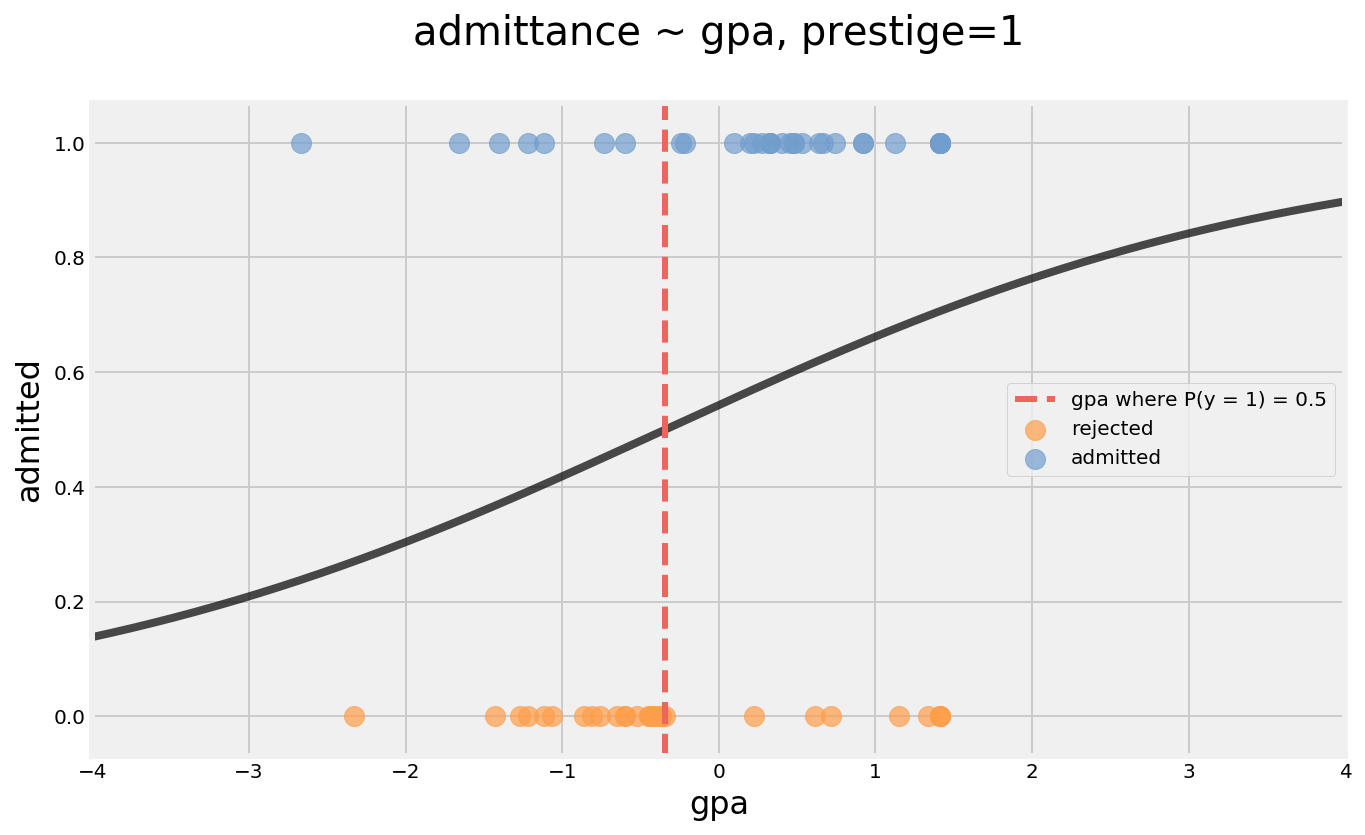

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

# plot the logreg regression line for admit ~ gpa
x_vals = np.linspace(-20., 20., 3000)
y_pp = logreg.predict_proba(x_vals[:, np.newaxis])[:, 1]

ax.plot(x_vals, y_pp, color='black', alpha=0.7, lw=4)

# do one scatter plot for each type of admit:
ax.scatter(X.gpa[y == 0],
           y[y == 0],
           c=colors['orange'], s=100, alpha=0.7,
           label='rejected')

ax.scatter(X.gpa[y == 1],
           y[y == 1],
           c=colors['blue'], s=100, alpha=0.7,
           label='admitted')

ax.axvline(xval_chance, lw=3, color=colors['red'], ls='dashed',
           label='gpa where P(y = 1) = 0.5')

ax.set_ylabel('admitted', fontsize=16)
ax.set_xlabel('gpa', fontsize=16)
ax.set_xlim([-4, 4])
ax.set_title('admittance ~ gpa, prestige=1\n', fontsize=20)


plt.legend(loc='center right')
plt.show()

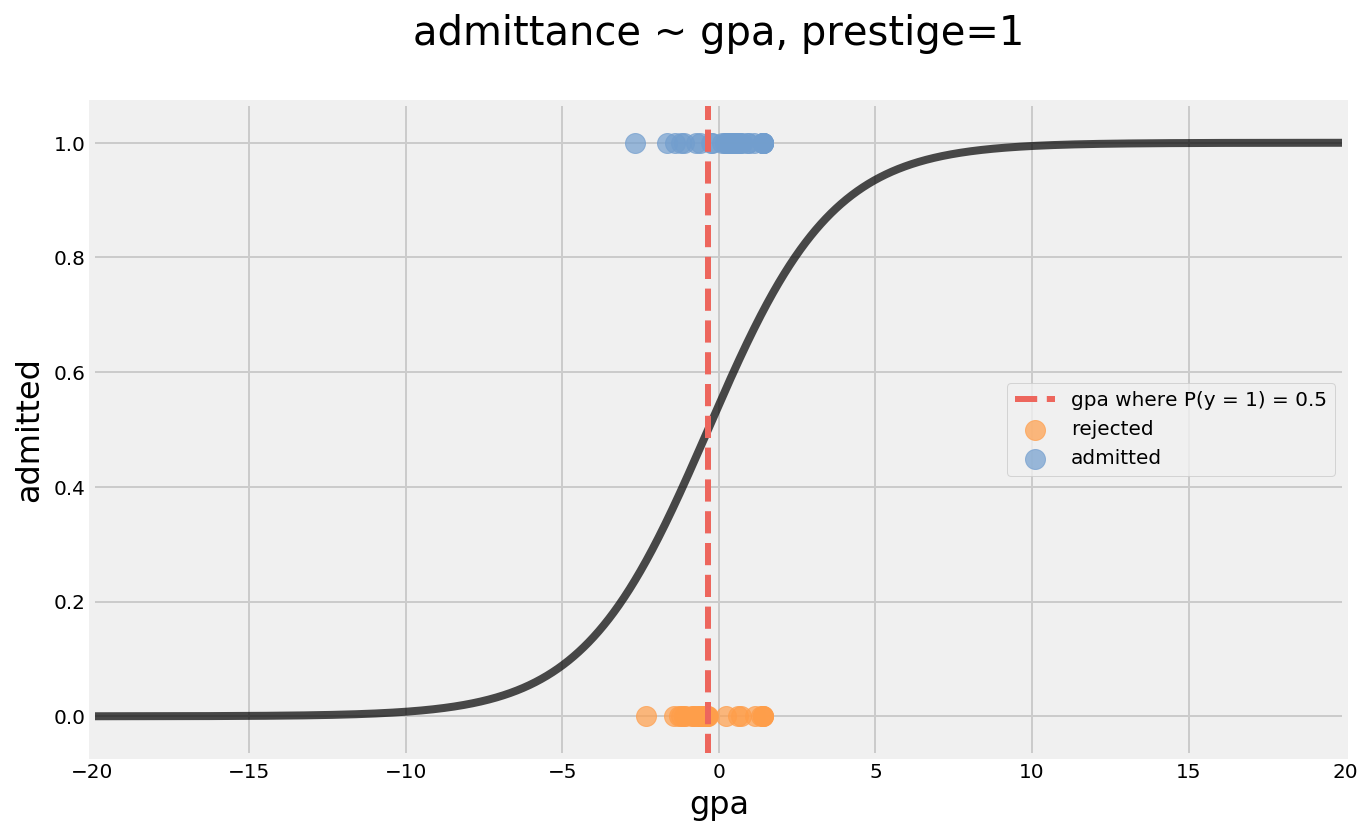

In [33]:
ax.set_xlim([-20, 20])
fig

## Interpreting logistic regression coefficients
---


Due to our rescaling, a value of `gpa=0` indicates an average `gpa`. A value of `gpa=1` indicates a value being one standard deviation larger than the mean.

### Meaning of the betas in log odds

The coefficients have a linear impact on the log-odds. 

> - If $\beta_1$ is 0, then $\beta_0$ represents the log odds of admittance for a student with an average gpa.

> - $\beta_1$ is the effect of a unit increase in rescaled gpa on the log odds of admittance. 

Log odds are hard to interpret. Luckily though, we can apply the logistic transform to get the probability of admittance at different $\beta$ values.

From the curve we can see that values of `gpa` within 2 or 3 standard deviations of the mean lead to a practically linear increase of the probability of admission, whereas values very far to the left or the right do hardly increase or decrease the probability of admission any further as the curve becomes very flat. 

## Solving for the beta coefficients

---

Logistic regression maximizes the likelihood that the predicted probabilities give the correct class. To do so, one considers the product of the predicted probabilities for all data points (this is called the **likelihood function** which is a **joint probability distribution** for the predicted probabilities per class):

$$
l(\beta) =  \prod_{i=1}^n P(X_i;\beta)^{y_i}\left(1-P(
X_i;\beta)\right)^{1-y_i}
$$

The $\beta$-coefficients are chosen in such a way that this function is maximized. The optimal case would be that 
- the predicted probabilities for all class one observations are one
- the predicted probabilities for all class zero observations are zero


There is not a closed-form solution to the beta coefficients like in linear regression, and the betas are found through optimization procedures.

If you are particularly interested in the math, these two resources are good:

[A good blog post on the logistic regression beta coefficient derivation.](http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/)

[This paper is also a good reference.](https://www.stat.cmu.edu/~cshalizi/402/lectures/14-logistic-regression/lecture-14.pdf)

<a id='interpreting'></a>

## Conclusion

---

Logistic regression is attractive for many reasons.

#### Benefits of Logistic regression include:

- Logistic regression is a classification algorithm that shares similar properties to linear regression
- It is very fast and efficient and is by far the most common classification algorithm
- The coefficients in a logistic regression model are interpretable (albeit somewhat complex): they represent the change in log-odds due to the input variables

<a id='resources'></a>

## Additional resources

---

- [Logistic Regression Video Walkthrough](https://www.youtube.com/watch?v=zAULhNrnuL4&noredirect=1)
- [Logistic Regression Walkthrough](http://www.mc.vanderbilt.edu/gcrc/workshop_files/2004-11-12.pdf)
- [Logistic Regression with Statsmodels - Well Switching in Bangladesh](http://nbviewer.ipython.org/urls/raw.github.com/carljv/Will_it_Python/master/ARM/ch5/arsenic_wells_switching.ipynb)
- [Odds Ratio Explanation](http://www.wright.edu/~thaddeus.tarpey/ES714glm.pdf)
- [0 and 1 are not probabilities](http://lesswrong.com/lw/mp/0_and_1_are_not_probabilities/)

## Code summary

---

### Sklearn logistic regression


> Never mind the additional arguments in the LogisticRegression instance. This serves only to match different default settings in statsmodels.

See [sklearn logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [34]:
# the default value for C is 1
# choosing a very large C switches regularization off (for comparison to statsmodels)
# the solver specifies the numerical method - this is usually not important
# and only done here for comparing to statsmodels

logreg = LogisticRegression(C=10**10, solver='lbfgs')
logreg.fit(X, y)

print('Logreg intercept:', logreg.intercept_)
print('Logreg coef(s):', logreg.coef_)
print('Logreg predicted probabilities:\n',
      logreg.predict_proba(X.iloc[0:5, :]))
print('Logreg predicted classes:', logreg.predict(X.iloc[0:5, :]))

Logreg intercept: [0.17203973]
Logreg coef(s): [[0.53881988]]
Logreg predicted probabilities:
 [[0.28241386 0.71758614]
 [0.61913003 0.38086997]
 [0.53795722 0.46204278]
 [0.28241386 0.71758614]
 [0.28241386 0.71758614]]
Logreg predicted classes: [1 0 0 1 1]


### Statsmodels logistic regression

See [statsmodels logistic regression](http://statsmodels.sourceforge.net/devel/generated/statsmodels.discrete.discrete_model.Logit.fit.html).

In [35]:
# Statsmodels refers to a scipy function whose name has been changed recently.
# The problem has apparently been fixed now. If you obtain an error message, either update statsdmodels
# or include
# the following lines of code as a translation between old and new function names.

# from scipy import stats
# stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [36]:
# formula version
import statsmodels.formula.api as sm

X_i = X.copy()
X_i['admit'] = y

model = sm.logit('admit~gpa', data=X_i).fit(method='lbfgs')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                   61
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                 0.04839
Time:                        17:45:01   Log-Likelihood:                -40.041
converged:                       True   LL-Null:                       -42.077
                                        LLR p-value:                   0.04360
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1720      0.266      0.647      0.518      -0.349       0.693
gpa            0.5388      0.278      1.939      0.052      -0.006       1.083
==============================================================================
"""

In [37]:
model.params

Intercept    0.17204
gpa          0.53882
dtype: float64

In [38]:
print('Logreg intercept:', model.params[0])
print('Logreg coef(s):', model.params[1])
print('Logreg predicted classes:', 1 *
      (model.predict(X.iloc[:5, :]) > 0.5).values)

Logreg intercept: 0.17203973480014229
Logreg coef(s): 0.5388198768738123
Logreg predicted classes: [1 0 0 1 1]


In [39]:
# Check that all predictions are the same for sklearn and statsmodels
(logreg.predict(X)-1*(model.predict(X) > 0.5)).sum()

0

In [40]:
# data frame version
X_i = X.copy()
X_i['intercept'] = 1

model = sm.Logit(y, X_i).fit(method='lbfgs')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                   61
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                 0.04839
Time:                        17:45:01   Log-Likelihood:                -40.041
converged:                       True   LL-Null:                       -42.077
                                        LLR p-value:                   0.04360
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gpa            0.5388      0.278      1.939      0.052      -0.006       1.083
intercept      0.1720      0.266      0.647      0.518      -0.349       0.693
==============================================================================
"""

### Statsmodels with regularisation

For regularized logistic regression in statsmodels, see [here](http://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.Logit.fit_regularized.html).

In [41]:
model_regularised = sm.Logit(y, X_i).fit_regularized(alpha=1)
model_regularised.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6668411891352188
            Iterations: 10
            Function evaluations: 10
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                   61
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            1
Date:                Wed, 08 Jan 2020   Pseudo R-squ.:                 0.04665
Time:                        17:45:01   Log-Likelihood:                -40.114
converged:                       True   LL-Null:                       -42.077
                                        LLR p-value:                   0.04756
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gpa            0.4622      0.272      1.698      0.090      -0.071       0.996
intercept      0.1011      0.263      0.384      0.701      -0.414       0.616
==============================================================================
"""